In [1]:
import pandas as pd
import matplotlib.pyplot as plt

LABELS=0
VALUES=1

# Read CSV, ignore empty columns
df = pd.read_csv(
    "datos_practica.txt",
    sep="|", header=None, skipinitialspace=True
)

df.columns = [
    "FECHA TRANSACCION", "HORA TRANSACCION", "CLIENTE ID", "PERFIL CLIENTE", "SEGMENTO", "IP",
    "MODO ACCESO", "ID SESION", "IMPORTE", "TIPO MENSAJE", "CANAL", "FECHA SESION", "HORA SESION",
    "MEDIO AUTENTIFICACION", "TIPO TRANSACCION", "ENTIDAD", "OFICINA ORIGEN", "CUENTA ORIGEN",
    "ENTIDAD DESTINO", "OFICINA DESTINO", "CUENTA DESTINO", "TIPO FIRMA", "TIPO CUENTA ORIGEN",
    "PAIS DESTINO", "FECHA ALTA CANAL", "FECHA ACTIVACION CANAL", "FECHA NAC TITU CTA CARGO",
    "FECHA ALTA CTA CARGO", "PAIS IP", "LATITUD", "LONGITUD", "BROWSER", "BROWSER VERSION", "OS",
    "OS VERSION", "PROFESION CLIENTE", "SECTOR CLIENTE", "SEGMENTO CLIENTE", "INDICADOR FRAUDE"
]

# Parse dates and hours
dates = ["FECHA TRANSACCION", "FECHA SESION", "FECHA ALTA CANAL", "FECHA ACTIVACION CANAL",
         "FECHA NAC TITU CTA CARGO", "FECHA ALTA CTA CARGO"]
hours = ["HORA TRANSACCION", "HORA SESION"]

for column in dates:
    df[column] = pd.to_datetime(df[column], format="%Y%m%d")

df["HORA TRANSACCION"] =  df["HORA TRANSACCION"] // 10000 # Remove minutes and seconds from time
df["HORA SESION"] =  df["HORA SESION"] // 10000 # Remove minutes and seconds from time

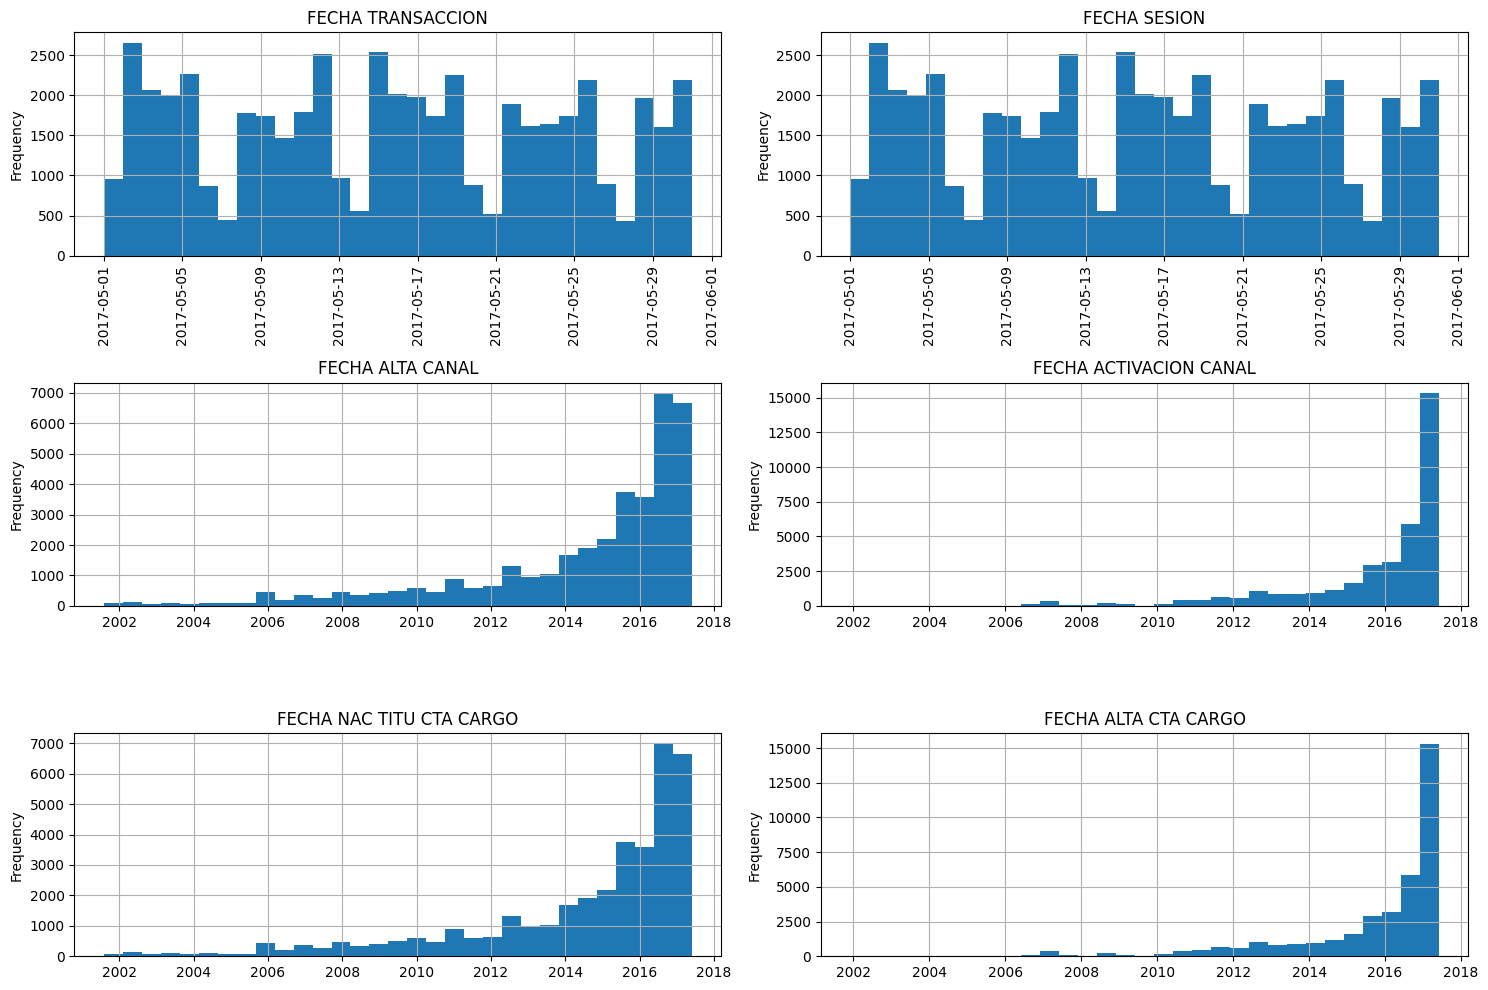

In [2]:
# PLOT DATES
fig, axes = plt.subplots(3,2, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    ax.hist(df[dates[i]], bins=31)
    ax.set_title(dates[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)
    if i < 2:
        for tick in ax.get_xticklabels():
            tick.set_rotation(90)

plt.tight_layout()
plt.show()

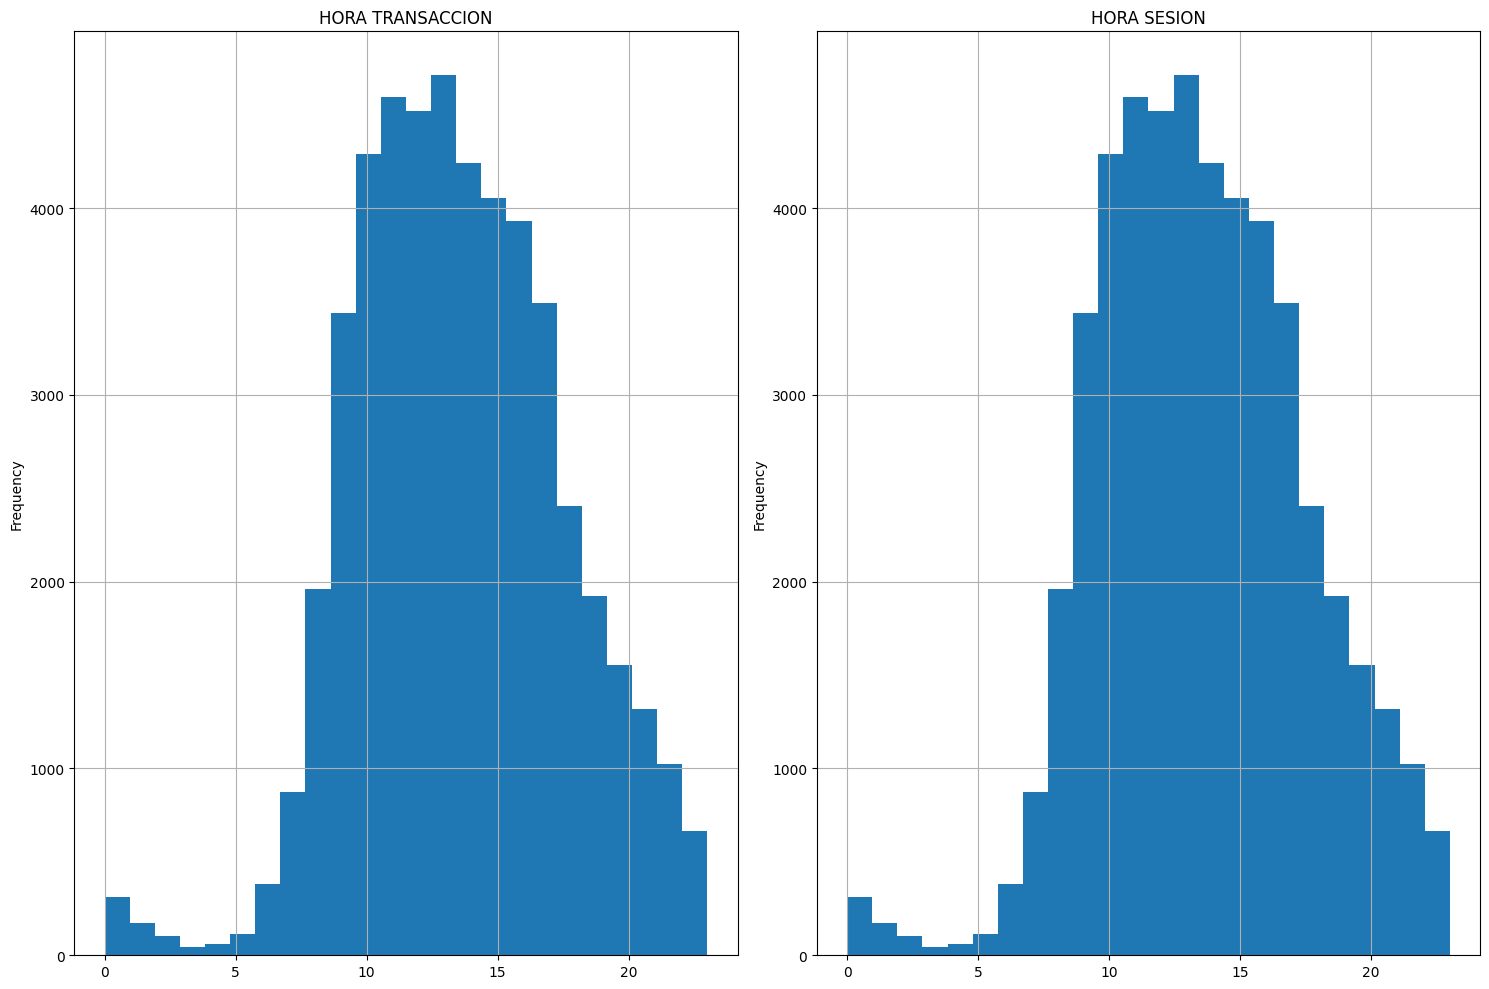

In [3]:
# PLOT HOURS
fig, axes = plt.subplots(1,2, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    ax.hist(df[hours[i]], bins=24)
    ax.set_title(hours[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

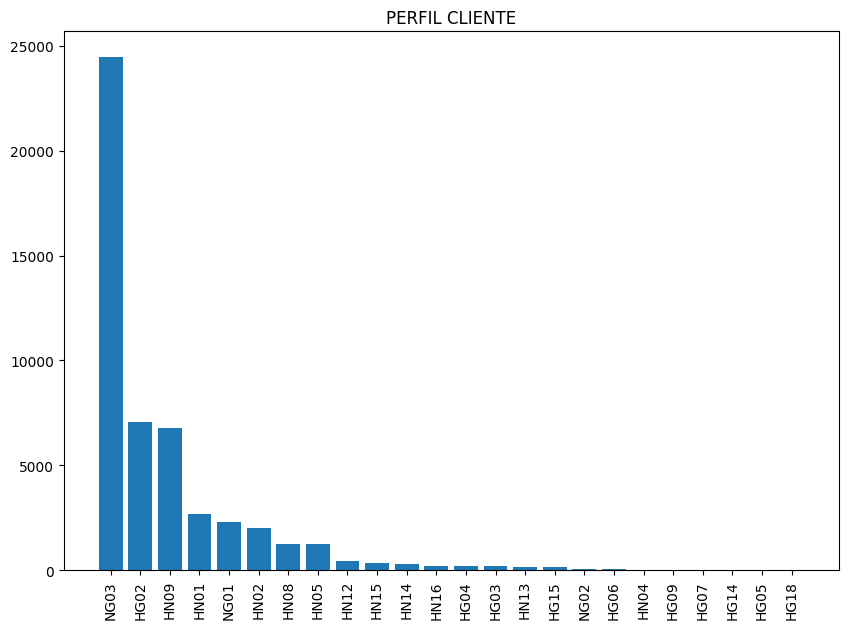

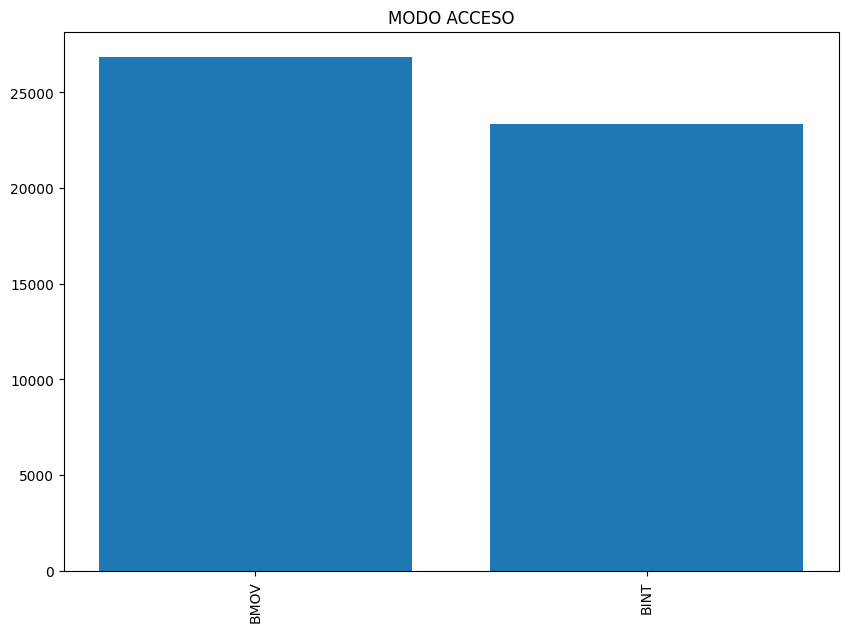

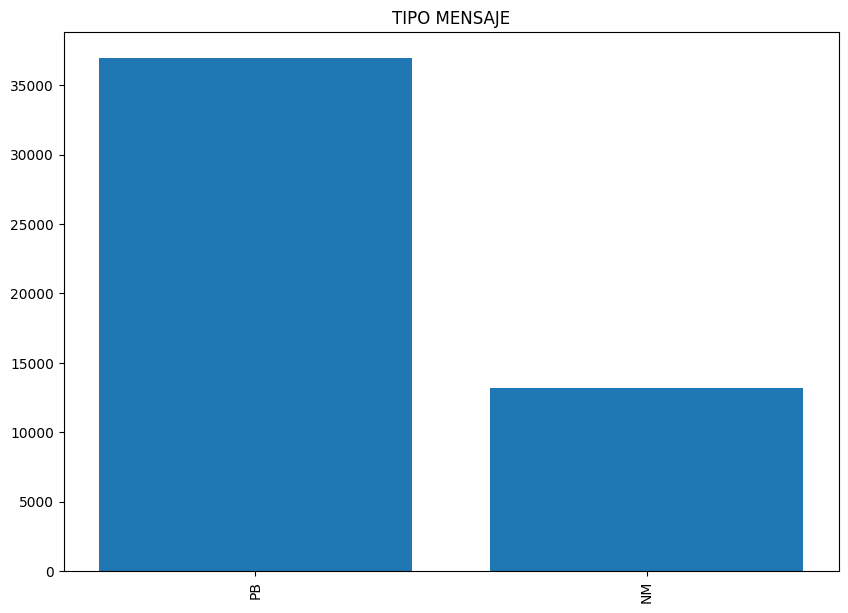

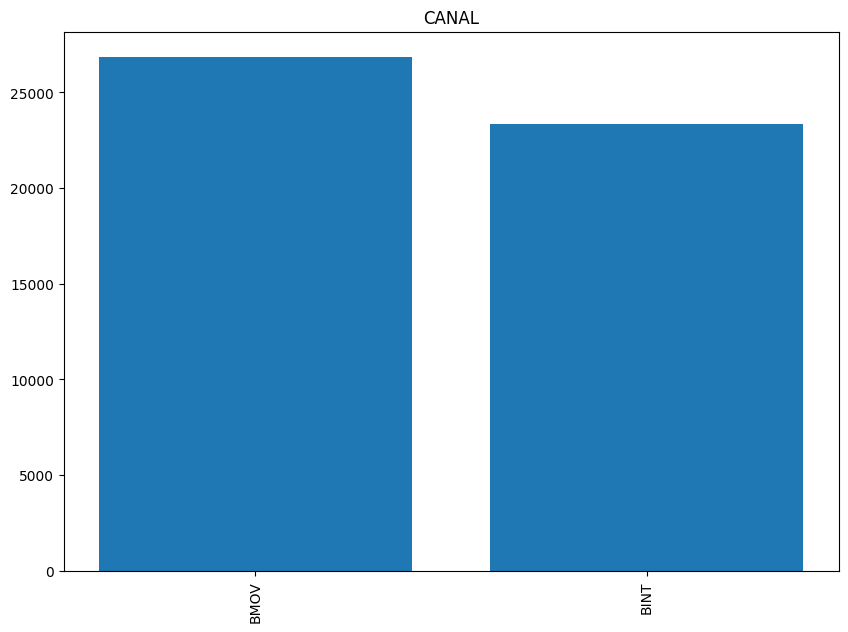

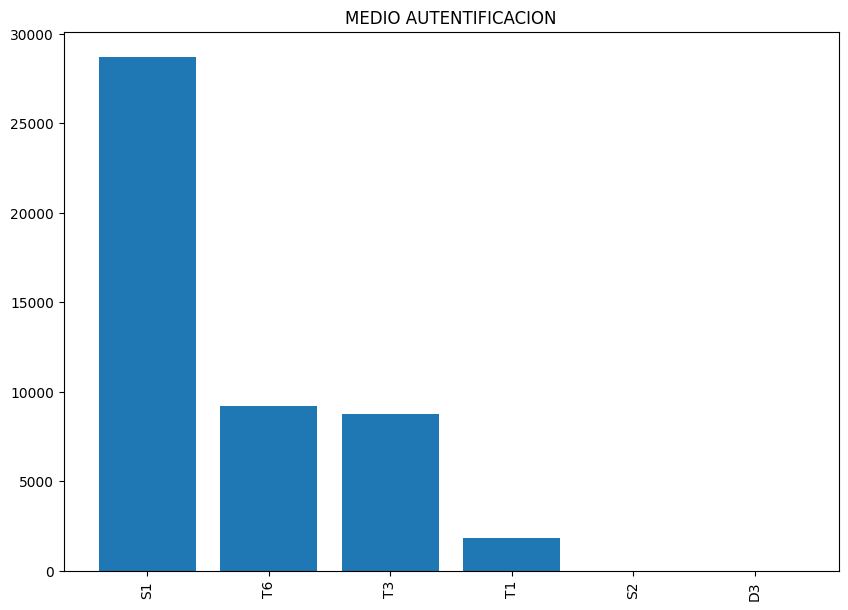

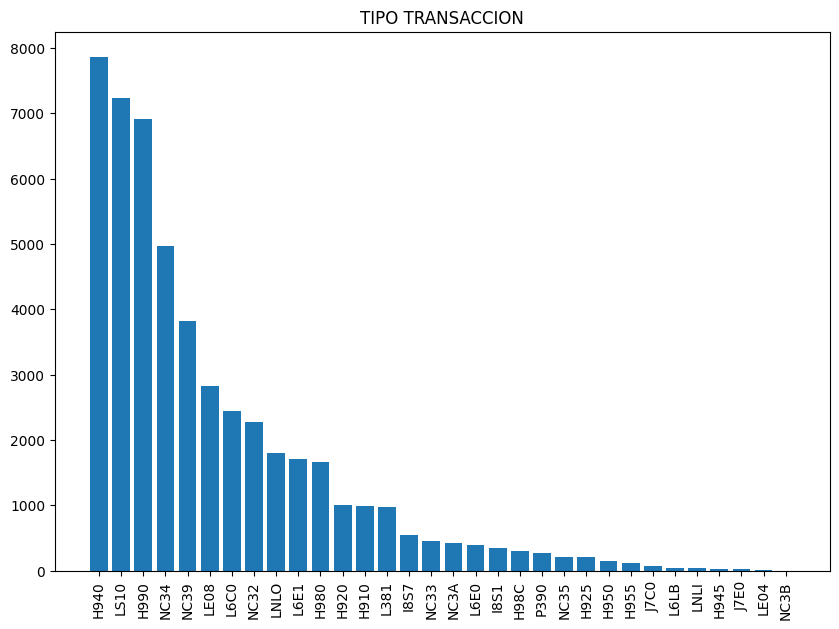

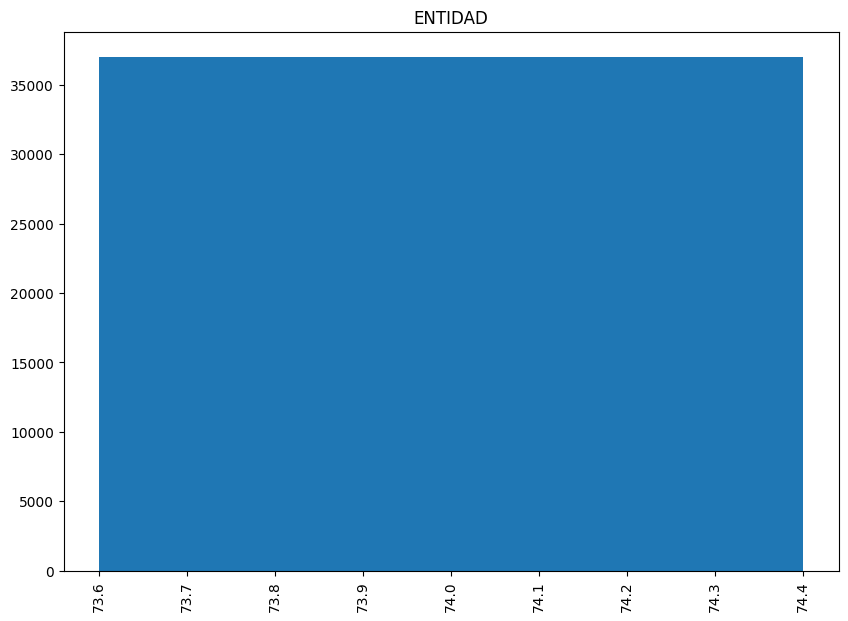

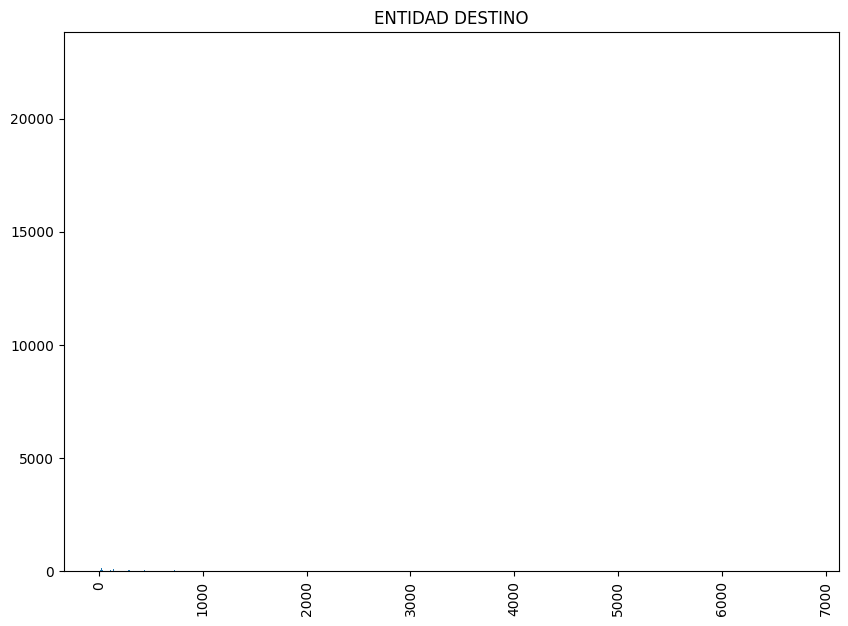

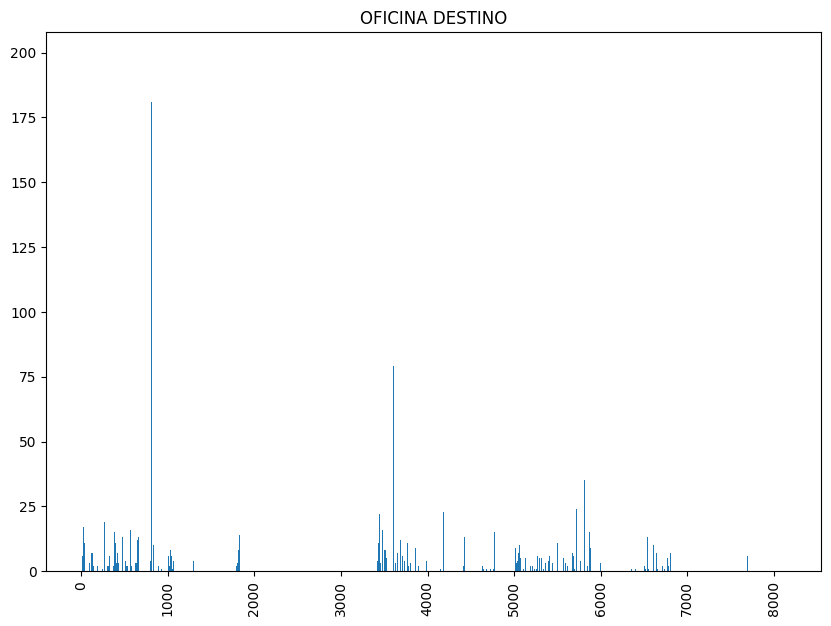

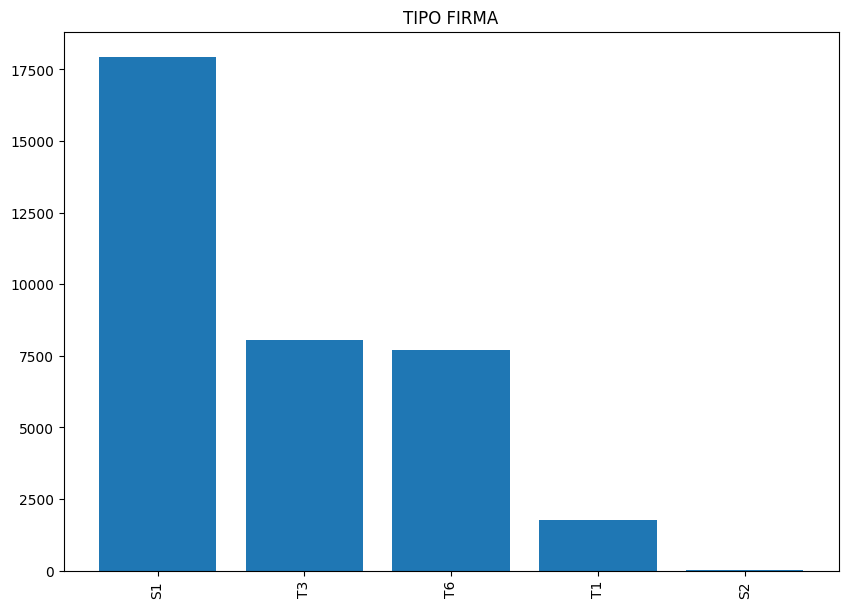

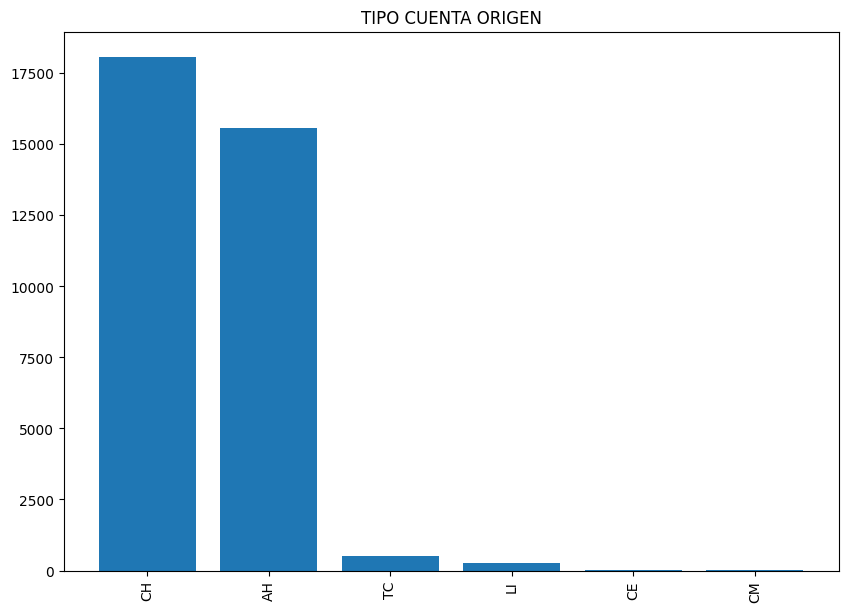

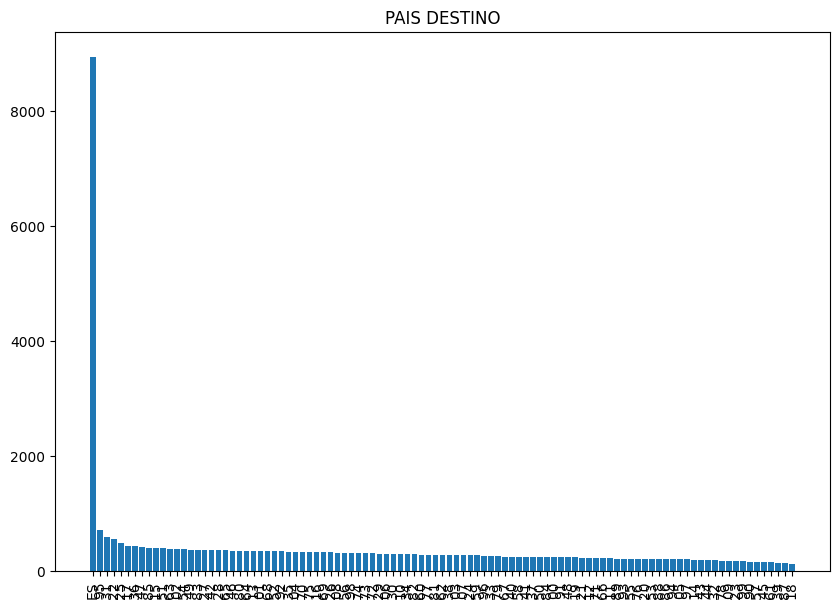

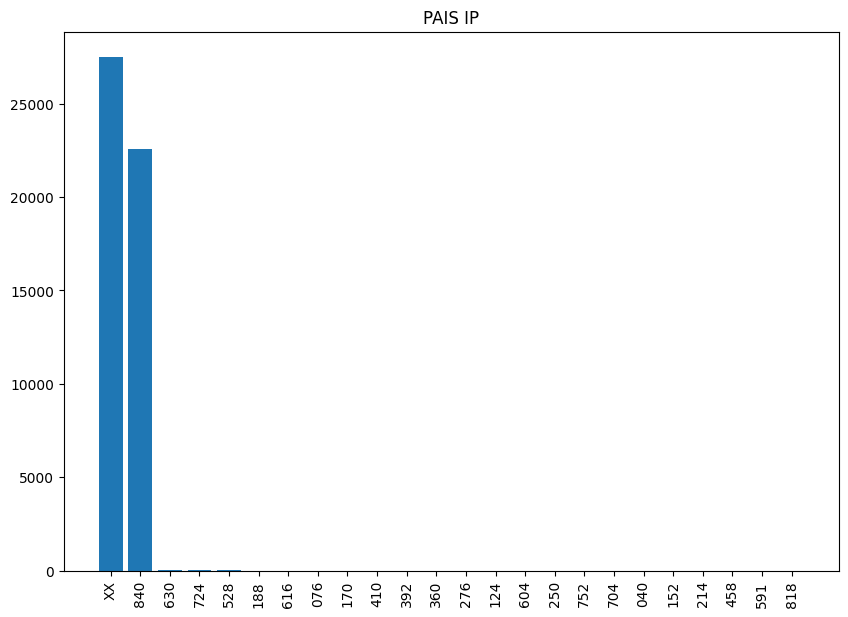

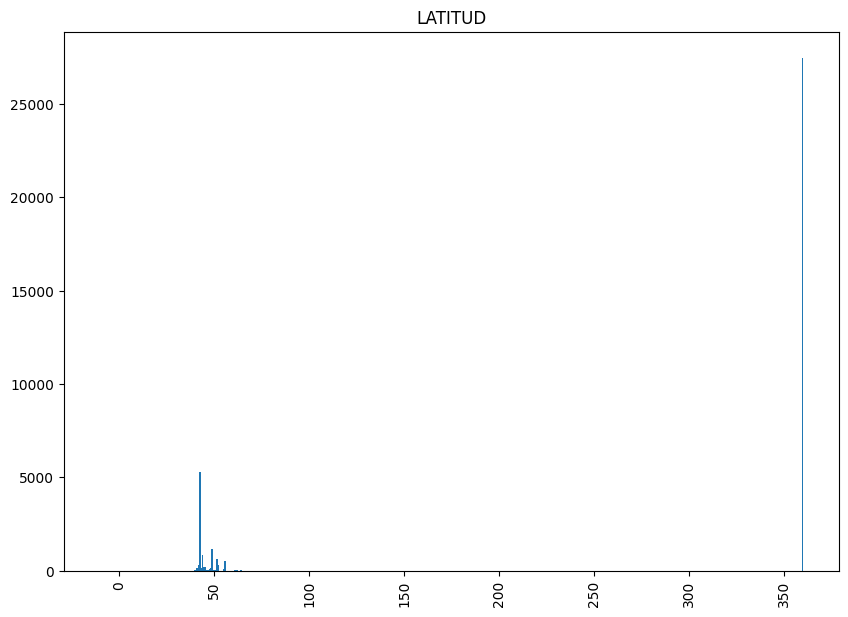

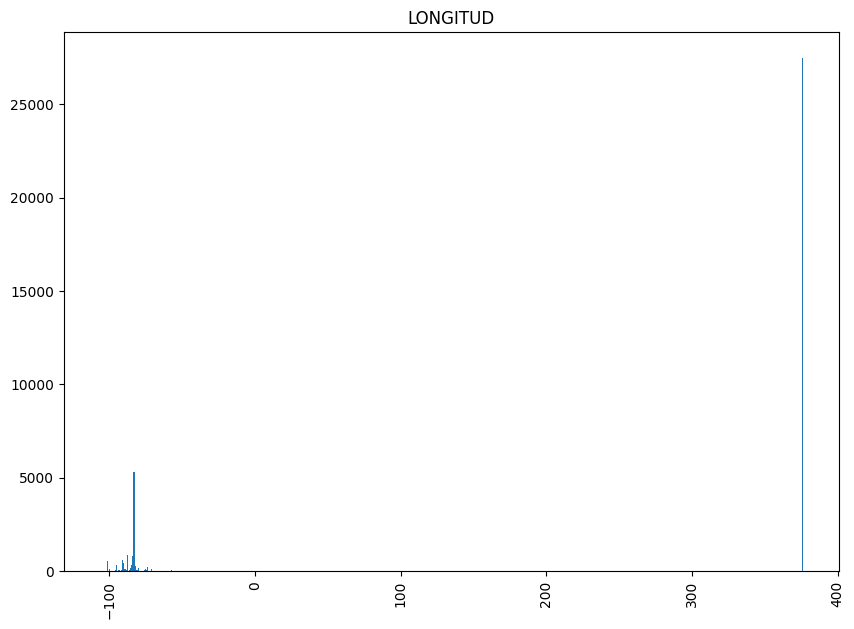

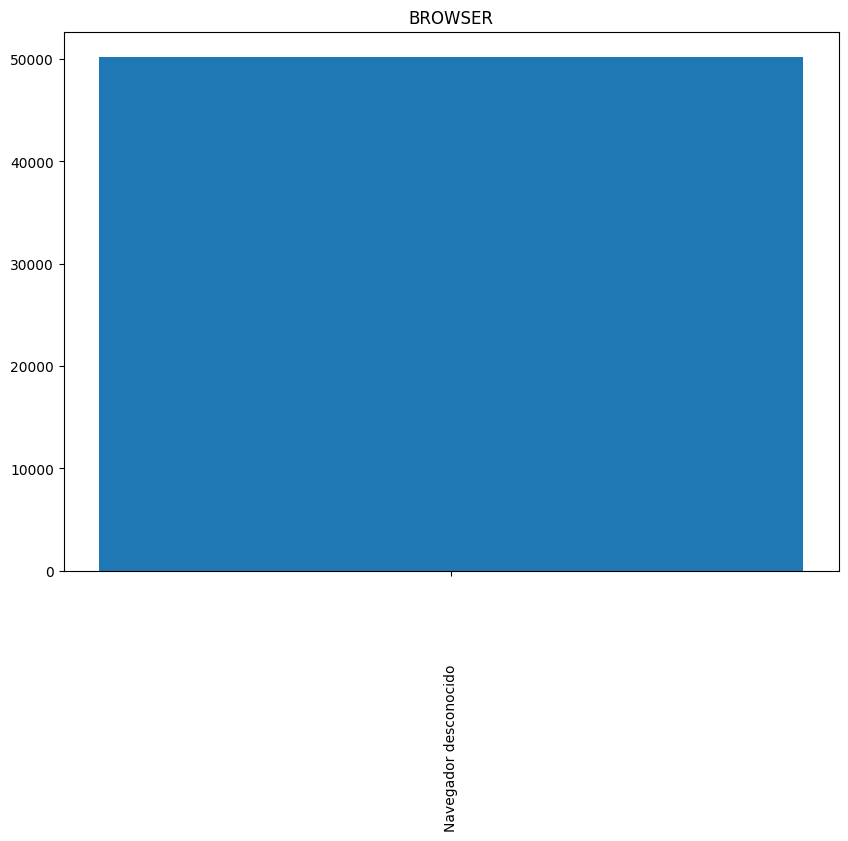

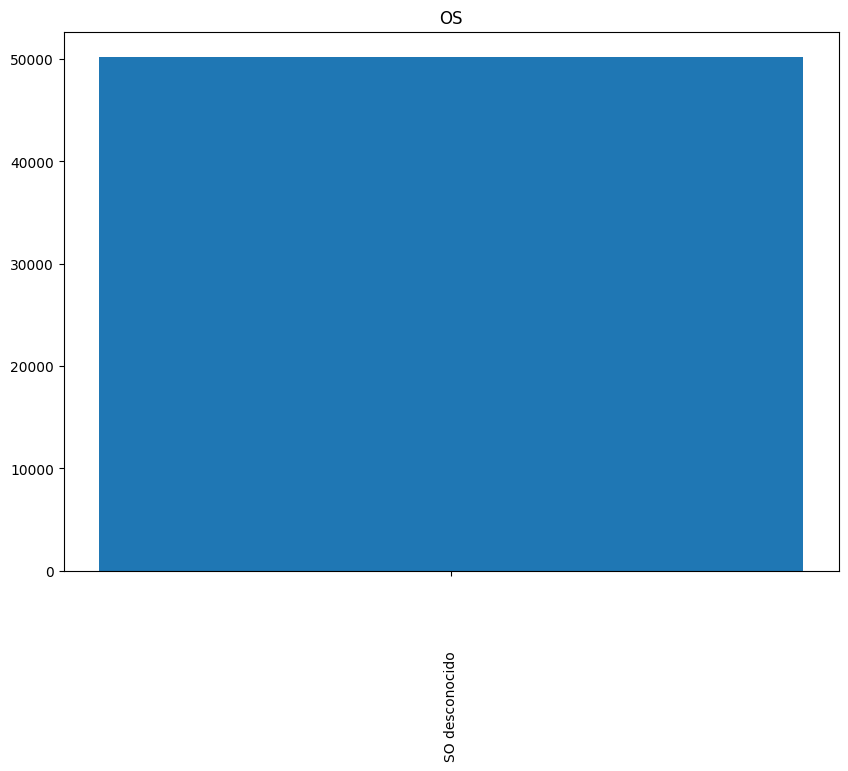

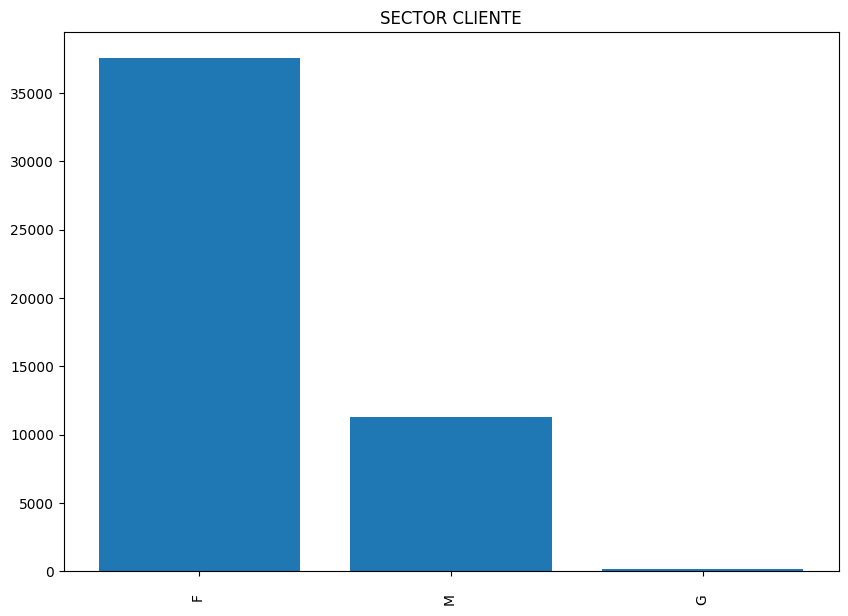

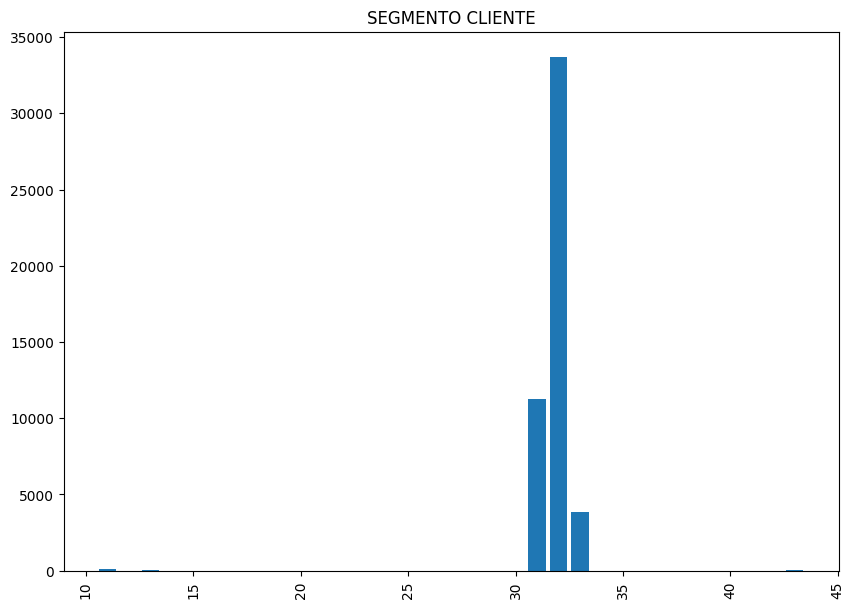

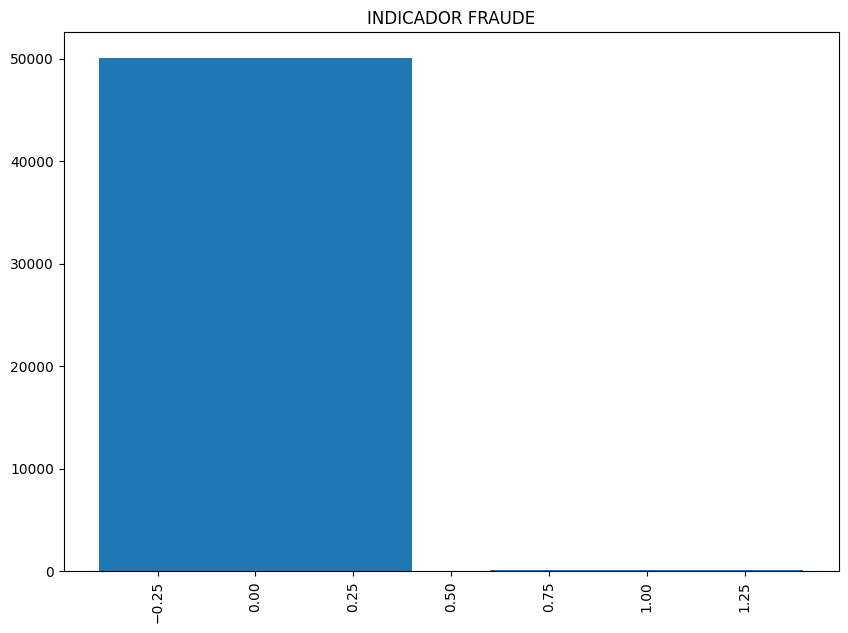

In [11]:
# PLOT CATEGORICAL VALUES
cols = [c for c in df.columns if c not in (dates + hours)]
freqs : dict = {}
for col in cols:
    ifreqs = df.value_counts(col)
    keys = list(ifreqs.keys())
    freqs[col] = [keys, [ifreqs[k] for k in keys]]
for key in freqs:
    if 0 < len(freqs[key][LABELS]) <= 2000:
        plt.figure(figsize=(10,7))
        plt.bar(freqs[key][LABELS], freqs[key][VALUES])
        plt.title(f"{key}")
        plt.xticks(rotation=90)
        plt.show()

In [1]:
# TODO: Ejercicio 2 (David)